<a href="https://colab.research.google.com/github/gomlfx/ApiaryFund/blob/master/AGC27_2_6_close_training_only.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
#License: GPL 
#Creator: Mike Smith https://github.com/gomlfx 
#designed for colab/kaggle/Jupyter

In [24]:
#!pip install autogluon
#!pip install --upgrade mxnet

In [25]:
import pandas as pd
import numpy as np
#import matplotlib for plotting 
import matplotlib.pyplot as plt
%matplotlib inline
#import normalization
from sklearn import preprocessing

#autogluon
from autogluon.tabular import TabularDataset, TabularPredictor

In [26]:
#metatrader5 file format
df=pd.read_table('/content/USDJPY_H1_197101040000_202206030400.csv')

In [27]:
print(df.head())
print(df.tail())
df.info()

       <DATE>    <TIME>  <OPEN>  <HIGH>   <LOW>  <CLOSE>  <TICKVOL>  <VOL>  \
0  1971.01.04  00:00:00  357.73  357.73  357.73   357.73          1      0   
1  1971.01.05  00:00:00  357.81  357.81  357.81   357.81          1      0   
2  1971.01.06  00:00:00  357.86  357.86  357.86   357.86          1      0   
3  1971.01.07  00:00:00  357.87  357.87  357.87   357.87          1      0   
4  1971.01.08  00:00:00  357.82  357.82  357.82   357.82          1      0   

   <SPREAD>  
0        50  
1        50  
2        50  
3        50  
4        50  
            <DATE>    <TIME>   <OPEN>   <HIGH>    <LOW>  <CLOSE>  <TICKVOL>  \
152426  2022.06.03  00:00:00  129.800  129.864  129.757  129.835        889   
152427  2022.06.03  01:00:00  129.827  129.892  129.827  129.874       2187   
152428  2022.06.03  02:00:00  129.874  129.968  129.864  129.940       2554   
152429  2022.06.03  03:00:00  129.939  130.043  129.695  129.752       5599   
152430  2022.06.03  04:00:00  129.749  129.825  129.

In [28]:
df

,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<TICKVOL>,<VOL>,<SPREAD>
0,1971.01.04,00:00:00,357.730,357.730,357.730,357.730,1,0,50
1,1971.01.05,00:00:00,357.810,357.810,357.810,357.810,1,0,50
2,1971.01.06,00:00:00,357.860,357.860,357.860,357.860,1,0,50
3,1971.01.07,00:00:00,357.870,357.870,357.870,357.870,1,0,50
4,1971.01.08,00:00:00,357.820,357.820,357.820,357.820,1,0,50
...,...,...,...,...,...,...,...,...,...
152426,2022.06.03,00:00:00,129.800,129.864,129.757,129.835,889,0,18
152427,2022.06.03,01:00:00,129.827,129.892,129.827,129.874,2187,0,4
152428,2022.06.03,02:00:00,129.874,129.968,129.864,129.940,2554,0,1
152429,2022.06.03,03:00:00,129.939,130.043,129.695,129.752,5599,0,0


In [29]:
d = df[["<OPEN>","<HIGH>","<LOW>","<CLOSE>"]]
df = pd.DataFrame(data=d)
df

,<OPEN>,<HIGH>,<LOW>,<CLOSE>
0,357.730,357.730,357.730,357.730
1,357.810,357.810,357.810,357.810
2,357.860,357.860,357.860,357.860
3,357.870,357.870,357.870,357.870
4,357.820,357.820,357.820,357.820
...,...,...,...,...
152426,129.800,129.864,129.757,129.835
152427,129.827,129.892,129.827,129.874
152428,129.874,129.968,129.864,129.940
152429,129.939,130.043,129.695,129.752


In [30]:
df_raw1 = pd.DataFrame(data=df)
df_raw1

,<OPEN>,<HIGH>,<LOW>,<CLOSE>
0,357.730,357.730,357.730,357.730
1,357.810,357.810,357.810,357.810
2,357.860,357.860,357.860,357.860
3,357.870,357.870,357.870,357.870
4,357.820,357.820,357.820,357.820
...,...,...,...,...
152426,129.800,129.864,129.757,129.835
152427,129.827,129.892,129.827,129.874
152428,129.874,129.968,129.864,129.940
152429,129.939,130.043,129.695,129.752


In [31]:
stop_df = pd.DataFrame(data=df.tail(40))  
stop_df.iloc[:-1] 
stop_df1 = stop_df[stop_df['<OPEN>'] > stop_df['<CLOSE>']]
print(stop_df1)

stop_df2 = stop_df[stop_df['<OPEN>'] < stop_df['<CLOSE>']]
print(stop_df2)


         <OPEN>   <HIGH>    <LOW>  <CLOSE>
152393  129.554  129.555  129.303  129.328
152399  130.155  130.183  130.092  130.124
152401  130.171  130.187  130.111  130.111
152403  130.134  130.186  130.095  130.109
152405  130.127  130.220  129.880  130.037
152406  130.035  130.109  129.992  129.998
152408  130.135  130.138  130.043  130.084
152409  130.084  130.094  129.989  130.058
152410  130.058  130.093  129.952  130.029
152411  130.032  130.046  129.823  129.849
152413  129.898  129.969  129.838  129.895
152414  129.895  129.911  129.690  129.762
152415  129.762  129.839  129.706  129.726
152416  129.727  129.767  129.614  129.674
152417  129.675  129.755  129.513  129.643
152419  129.944  130.042  129.813  129.846
152420  129.846  129.866  129.695  129.841
152421  129.842  129.859  129.723  129.781
152424  129.858  129.877  129.831  129.852
152425  129.855  129.898  129.831  129.835
152429  129.939  130.043  129.695  129.752
         <OPEN>   <HIGH>    <LOW>  <CLOSE>
152391  129

In [32]:

stop_df1['stop_for_sell'] = stop_df1['<HIGH>'] - stop_df1['<OPEN>']
print(stop_df1.stop_for_sell)

stop_df2['stop_for_buy'] = stop_df2['<OPEN>'] - stop_df2['<LOW>']
print(stop_df2.stop_for_buy)

152393    0.001
152399    0.028
152401    0.016
152403    0.052
152405    0.093
152406    0.074
152408    0.003
152409    0.010
152410    0.035
152411    0.014
152413    0.071
152414    0.016
152415    0.077
152416    0.040
152417    0.080
152419    0.098
152420    0.020
152421    0.017
152424    0.019
152425    0.043
152429    0.104
Name: stop_for_sell, dtype: float64
152391    0.052
152392    0.004
152394    0.123
152395    0.000
152396    0.054
152397    0.148
152398    0.077
152400    0.006
152402    0.006
152404    0.006
152407    0.106
152412    0.083
152418    0.011
152422    0.012
152423    0.053
152426    0.043
152427    0.000
152428    0.010
152430    0.001
Name: stop_for_buy, dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [33]:
print(stop_df1.stop_for_sell.describe(percentiles=[.25,.5,.75,.9,.95,.99]))
print(stop_df2.stop_for_buy.describe(percentiles=[.25,.5,.75,.9,.95,.99]))

count    21.000000
mean      0.043381
std       0.033485
min       0.001000
25%       0.016000
50%       0.035000
75%       0.074000
90%       0.093000
95%       0.098000
99%       0.102800
max       0.104000
Name: stop_for_sell, dtype: float64
count    19.000000
mean      0.041842
std       0.046302
min       0.000000
25%       0.006000
50%       0.012000
75%       0.065500
90%       0.109400
95%       0.125500
99%       0.143500
max       0.148000
Name: stop_for_buy, dtype: float64


In [34]:
stop_for_sell = stop_df1.stop_for_sell.describe()
stop_for_buy = stop_df2.stop_for_buy.describe()
 

In [35]:
df.rename({'<OPEN>':'p_o','<HIGH>':'p_h','<LOW>':'p_l','<CLOSE>':'p_c'}, axis='columns', inplace=True)

In [36]:
df.info

<bound method DataFrame.info of             p_o      p_h      p_l      p_c
0       357.730  357.730  357.730  357.730
1       357.810  357.810  357.810  357.810
2       357.860  357.860  357.860  357.860
3       357.870  357.870  357.870  357.870
4       357.820  357.820  357.820  357.820
...         ...      ...      ...      ...
152426  129.800  129.864  129.757  129.835
152427  129.827  129.892  129.827  129.874
152428  129.874  129.968  129.864  129.940
152429  129.939  130.043  129.695  129.752
152430  129.749  129.825  129.748  129.811

[152431 rows x 4 columns]>

In [37]:
print(df.columns)

Index(['p_o', 'p_h', 'p_l', 'p_c'], dtype='object')


In [38]:
#Features



#380 periods ago

df['p_Close_last_period380'] = df['p_c'].shift(380)
#379 periods ago

df['p_Close_last_period379'] = df['p_c'].shift(379)
#378 periods ago

df['p_Close_last_period378'] = df['p_c'].shift(378)
#377 periods ago

df['p_Close_last_period377'] = df['p_c'].shift(377)
#376 periods ago
df['p_Close_last_period376'] = df['p_c'].shift(376)
#375 periods ago
df['p_Close_last_period375'] = df['p_c'].shift(375)
#374 periods ago
df['p_Close_last_period374'] = df['p_c'].shift(374)
#373 periods ago
df['p_Close_last_period373'] = df['p_c'].shift(373)
#372 periods ago
df['p_Close_last_period372'] = df['p_c'].shift(372)
#371 periods ago
df['p_Close_last_period371'] = df['p_c'].shift(371)
#370 periods ago
df['p_Close_last_period370'] = df['p_c'].shift(370)
#369 periods ago
df['p_Close_last_period369'] = df['p_c'].shift(369)
#368 periods ago
df['p_Close_last_period368'] = df['p_c'].shift(368)
#367 periods ago
df['p_Close_last_period367'] = df['p_c'].shift(367)
#366 periods ago
df['p_Close_last_period366'] = df['p_c'].shift(366)
#365 periods ago
df['p_Close_last_period365'] = df['p_c'].shift(365)
#364 periods ago
df['p_Close_last_period364'] = df['p_c'].shift(364)
#363 periods ago
df['p_Close_last_period363'] = df['p_c'].shift(363)
#362 periods ago
df['p_Close_last_period362'] = df['p_c'].shift(362)
#361 periods ago
df['p_Close_last_period361'] = df['p_c'].shift(361)
#360 periods ago
df['p_Close_last_period360'] = df['p_c'].shift(360)
#359 periods ago
df['p_Close_last_period359'] = df['p_c'].shift(359)
#358 periods ago
df['p_Close_last_period358'] = df['p_c'].shift(358)
#357 periods ago
df['p_Close_last_period357'] = df['p_c'].shift(357)
#356 periods ago
df['p_Close_last_period356'] = df['p_c'].shift(356)
#355 periods ago
df['p_Close_last_period355'] = df['p_c'].shift(355)
#354 periods ago
df['p_Close_last_period354'] = df['p_c'].shift(354)
#353 periods ago
df['p_Close_last_period353'] = df['p_c'].shift(353)
#352 periods ago
df['p_Close_last_period352'] = df['p_c'].shift(352)
#351 periods ago
df['p_Close_last_period351'] = df['p_c'].shift(351)
#350 periods ago
df['p_Close_last_period350'] = df['p_c'].shift(350)
#349 periods ago
df['p_Close_last_period349'] = df['p_c'].shift(349)
#348 periods ago
df['p_Close_last_period348'] = df['p_c'].shift(348)
#347 periods ago
df['p_Close_last_period347'] = df['p_c'].shift(347)
#346 periods ago
df['p_Close_last_period346'] = df['p_c'].shift(346)
#345 periods ago
df['p_Close_last_period345'] = df['p_c'].shift(345)
#344 periods ago
df['p_Close_last_period344'] = df['p_c'].shift(344)
#343 periods ago
df['p_Close_last_period343'] = df['p_c'].shift(343)
#342 periods ago
df['p_Close_last_period342'] = df['p_c'].shift(342)
#341 periods ago
df['p_Close_last_period341'] = df['p_c'].shift(341)
#340 periods ago
df['p_Close_last_period340'] = df['p_c'].shift(340)
#339 periods ago
df['p_Close_last_period339'] = df['p_c'].shift(339)
#338 periods ago
df['p_Close_last_period338'] = df['p_c'].shift(338)
#337 periods ago
df['p_Close_last_period337'] = df['p_c'].shift(337)
#336 periods ago
df['p_Close_last_period336'] = df['p_c'].shift(336)
#335 periods ago
df['p_Close_last_period335'] = df['p_c'].shift(335)
#334 periods ago
df['p_Close_last_period334'] = df['p_c'].shift(334)
#333 periods ago
df['p_Close_last_period333'] = df['p_c'].shift(333)
#332 periods ago
df['p_Close_last_period332'] = df['p_c'].shift(332)
#331 periods ago
df['p_Close_last_period331'] = df['p_c'].shift(331)
#330 periods ago
df['p_Close_last_period330'] = df['p_c'].shift(330)
#329 periods ago
df['p_Close_last_period329'] = df['p_c'].shift(329)
#328 periods ago
df['p_Close_last_period328'] = df['p_c'].shift(328)
#327 periods ago
df['p_Close_last_period327'] = df['p_c'].shift(327)
#326 periods ago
df['p_Close_last_period326'] = df['p_c'].shift(326)
#325 periods ago
df['p_Close_last_period325'] = df['p_c'].shift(325)
#324 periods ago

df['p_Close_last_period324'] = df['p_c'].shift(324)
#323 periods ago
df['p_Close_last_period323'] = df['p_c'].shift(323)
#322 periods ago
df['p_Close_last_period322'] = df['p_c'].shift(322)
#321 periods ago
df['p_Close_last_period321'] = df['p_c'].shift(321)
#320 periods ago
df['p_Close_last_period320'] = df['p_c'].shift(320)
#319 periods ago
df['p_Close_last_period319'] = df['p_c'].shift(319)
#318 periods ago
df['p_Close_last_period318'] = df['p_c'].shift(318)
#317 periods ago
df['p_Close_last_period317'] = df['p_c'].shift(317)
#316 periods ago
df['p_Close_last_period316'] = df['p_c'].shift(316)
#315 periods ago
df['p_Close_last_period315'] = df['p_c'].shift(315)
#314 periods ago
df['p_Close_last_period314'] = df['p_c'].shift(314)
#313 periods ago
df['p_Close_last_period313'] = df['p_c'].shift(313)
#312 periods ago
df['p_Close_last_period312'] = df['p_c'].shift(312)
#311 periods ago
df['p_Close_last_period311'] = df['p_c'].shift(311)
#310 periods ago
df['p_Close_last_period310'] = df['p_c'].shift(310)
#309 periods ago
df['p_Close_last_period309'] = df['p_c'].shift(309)
#308 periods ago
df['p_Close_last_period308'] = df['p_c'].shift(308)
#307 periods ago
df['p_Open_last_period307'] = df['p_o'].shift(307) 
df['p_High_last_period307'] = df['p_h'].shift(307)
df['p_Low_last_period307'] = df['p_l'].shift(307)
df['p_Close_last_period307'] = df['p_c'].shift(307)
#306 periods ago
df['p_Close_last_period306'] = df['p_c'].shift(306)
#305 periods ago
df['p_Close_last_period305'] = df['p_c'].shift(305)
#304 periods ago
df['p_Close_last_period304'] = df['p_c'].shift(304)
#303 periods ago
df['p_Close_last_period303'] = df['p_c'].shift(303)
#302 periods ago
df['p_Close_last_period302'] = df['p_c'].shift(302)
#301 periods ago
df['p_Close_last_period301'] = df['p_c'].shift(301)
#300 periods ago
df['p_Close_last_period300'] = df['p_c'].shift(300)
#299 periods ago
df['p_Close_last_period299'] = df['p_c'].shift(299)
#298 periods ago
df['p_Close_last_period298'] = df['p_c'].shift(298)
#297 periods ago
df['p_Close_last_period297'] = df['p_c'].shift(297)
#296 periods ago
df['p_Close_last_period296'] = df['p_c'].shift(296)
#295 periods ago
df['p_Close_last_period295'] = df['p_c'].shift(295)
#294 periods ago
df['p_Close_last_period294'] = df['p_c'].shift(294)
#293 periods ago
df['p_Close_last_period293'] = df['p_c'].shift(293)
#292 periods ago
df['p_Close_last_period292'] = df['p_c'].shift(292)
#291 periods ago
df['p_Close_last_period291'] = df['p_c'].shift(291)
#290 periods ago
df['p_Close_last_period290'] = df['p_c'].shift(290)
#289 periods ago
df['p_Close_last_period289'] = df['p_c'].shift(289)
#288 periods ago
df['p_Close_last_period288'] = df['p_c'].shift(288)
#287 periods ago
df['p_Close_last_period287'] = df['p_c'].shift(287)
#286 periods ago
df['p_Close_last_period286'] = df['p_c'].shift(286)
#285 periods ago
df['p_Close_last_period285'] = df['p_c'].shift(285)
#284 periods ago
df['p_Close_last_period284'] = df['p_c'].shift(284)
#283 periods ago
df['p_Close_last_period283'] = df['p_c'].shift(283)
#282 periods ago
df['p_Close_last_period282'] = df['p_c'].shift(282)
#281 periods ago
df['p_Close_last_period281'] = df['p_c'].shift(281)
#280 periods ago
df['p_Close_last_period280'] = df['p_c'].shift(280)
#279 periods ago
df['p_Close_last_period279'] = df['p_c'].shift(279)
#278 periods ago
df['p_Close_last_period278'] = df['p_c'].shift(278)
#277 periods ago
df['p_Close_last_period277'] = df['p_c'].shift(277)
#276 periods ago
df['p_Close_last_period276'] = df['p_c'].shift(276)
#275 periods ago
df['p_Close_last_period275'] = df['p_c'].shift(275)
#274 periods ago
df['p_Close_last_period274'] = df['p_c'].shift(274)
#273 periods ago
df['p_Close_last_period273'] = df['p_c'].shift(273)
#272 periods ago
df['p_Close_last_period272'] = df['p_c'].shift(272)
#271 periods ago
df['p_Close_last_period271'] = df['p_c'].shift(271)
#270 periods ago
df['p_Close_last_period270'] = df['p_c'].shift(270)
#269 periods ago
df['p_Close_last_period269'] = df['p_c'].shift(269)
#268 periods ago
df['p_Close_last_period268'] = df['p_c'].shift(268)
#267 periods ago
df['p_Close_last_period267'] = df['p_c'].shift(267)
#266 periods ago
df['p_Close_last_period266'] = df['p_c'].shift(266)
#265 periods ago
df['p_Close_last_period265'] = df['p_c'].shift(265)
#264 periods ago
df['p_Close_last_period264'] = df['p_c'].shift(264)
#263 periods ago
df['p_Close_last_period263'] = df['p_c'].shift(263)
#262 periods ago
df['p_Close_last_period262'] = df['p_c'].shift(262)
#261 periods ago
df['p_Close_last_period261'] = df['p_c'].shift(261)
#260 periods ago
df['p_Close_last_period260'] = df['p_c'].shift(260)
#259 periods ago
df['p_Close_last_period259'] = df['p_c'].shift(259)
#258 periods ago
df['p_Close_last_period258'] = df['p_c'].shift(258)
#257 periods ago
df['p_Close_last_period257'] = df['p_c'].shift(257)
#256 periods ago
df['p_Close_last_period256'] = df['p_c'].shift(256)
#255 periods ago
df['p_Close_last_period255'] = df['p_c'].shift(255)
#254 periods ago
df['p_Close_last_period254'] = df['p_c'].shift(254)
#253 periods ago
df['p_Close_last_period253'] = df['p_c'].shift(253)
#252 periods ago
df['p_Close_last_period252'] = df['p_c'].shift(252)
#251 periods ago
df['p_Close_last_period251'] = df['p_c'].shift(251)
#250 periods ago
df['p_Close_last_period250'] = df['p_c'].shift(250)
#249 periods ago
df['p_Close_last_period249'] = df['p_c'].shift(249)
#248 periods ago
df['p_Close_last_period248'] = df['p_c'].shift(248)
#247 periods ago
df['p_Close_last_period247'] = df['p_c'].shift(247)
#246 periods ago
df['p_Close_last_period246'] = df['p_c'].shift(246)
#245 periods ago
df['p_Close_last_period245'] = df['p_c'].shift(245)
#244 periods ago
df['p_Close_last_period244'] = df['p_c'].shift(244)
#243 periods ago
df['p_Close_last_period243'] = df['p_c'].shift(243)
#242 periods ago
df['p_Close_last_period242'] = df['p_c'].shift(242)
#241 periods ago
df['p_Close_last_period241'] = df['p_c'].shift(241)
#240 periods ago
df['p_Close_last_period240'] = df['p_c'].shift(240)
#239 periods ago
df['p_Close_last_period239'] = df['p_c'].shift(239)
#238 periods ago
df['p_Close_last_period238'] = df['p_c'].shift(238)
#237 periods ago
df['p_Close_last_period237'] = df['p_c'].shift(237)
#236 periods ago
df['p_Close_last_period236'] = df['p_c'].shift(236)
#235 periods ago
df['p_Close_last_period235'] = df['p_c'].shift(235)
#234 periods ago
df['p_Close_last_period234'] = df['p_c'].shift(234)
#233 periods ago
df['p_Close_last_period233'] = df['p_c'].shift(233)
#232 periods ago
df['p_Close_last_period232'] = df['p_c'].shift(232)
#231 periods ago
df['p_Close_last_period231'] = df['p_c'].shift(231)
#230 periods ago
df['p_Close_last_period230'] = df['p_c'].shift(230)
#229 periods ago
df['p_Close_last_period229'] = df['p_c'].shift(229)
#228 periods ago
df['p_Close_last_period228'] = df['p_c'].shift(228)
#227 periods ago
df['p_Close_last_period227'] = df['p_c'].shift(227)
#226 periods ago
df['p_Close_last_period226'] = df['p_c'].shift(226)
#225 periods ago
df['p_Close_last_period225'] = df['p_c'].shift(225)
#224 periods ago
df['p_Close_last_period224'] = df['p_c'].shift(224)
#223 periods ago
df['p_Close_last_period223'] = df['p_c'].shift(223)
#222 periods ago
df['p_Close_last_period222'] = df['p_c'].shift(222)
#221 periods ago
df['p_Close_last_period221'] = df['p_c'].shift(221)
#220 periods ago
df['p_Close_last_period220'] = df['p_c'].shift(220)
#219 periods ago
df['p_Close_last_period219'] = df['p_c'].shift(219)
#218 periods ago
df['p_Close_last_period218'] = df['p_c'].shift(218)
#217 periods ago
df['p_Close_last_period217'] = df['p_c'].shift(217)
#216 periods ago
df['p_Close_last_period216'] = df['p_c'].shift(216)
#215 periods ago
df['p_Close_last_period215'] = df['p_c'].shift(215)
#214 periods ago
df['p_Close_last_period214'] = df['p_c'].shift(214)
#213 periods ago
df['p_Close_last_period213'] = df['p_c'].shift(213)
#212 periods ago
df['p_Close_last_period212'] = df['p_c'].shift(212)
#211 periods ago
df['p_Close_last_period211'] = df['p_c'].shift(211)
#210 periods ago
df['p_Close_last_period210'] = df['p_c'].shift(210)
#209 periods ago
df['p_Close_last_period209'] = df['p_c'].shift(209)
#208 periods ago
df['p_Close_last_period208'] = df['p_c'].shift(208)
#207 periods ago
df['p_Close_last_period207'] = df['p_c'].shift(207)
#206 periods ago
df['p_Close_last_period206'] = df['p_c'].shift(206)
#205 periods ago
df['p_Close_last_period205'] = df['p_c'].shift(205)
#204 periods ago
df['p_Close_last_period204'] = df['p_c'].shift(204)
#203 periods ago
df['p_Close_last_period203'] = df['p_c'].shift(203)
#202 periods ago
df['p_Close_last_period202'] = df['p_c'].shift(202)
#201 periods ago
df['p_Close_last_period201'] = df['p_c'].shift(201)
#200 periods ago
df['p_Close_last_period200'] = df['p_c'].shift(200)
#199 periods ago
df['p_Close_last_period199'] = df['p_c'].shift(199)
#198 periods ago
df['p_Close_last_period198'] = df['p_c'].shift(198)
#197 periods ago
df['p_Close_last_period197'] = df['p_c'].shift(197)
#196 periods ago
df['p_Close_last_period196'] = df['p_c'].shift(196)
#195 periods ago
df['p_Close_last_period195'] = df['p_c'].shift(195)
#194 periods ago
df['p_Close_last_period194'] = df['p_c'].shift(194)
#193 periods ago
df['p_Close_last_period193'] = df['p_c'].shift(193)
#192 periods ago
df['p_Close_last_period192'] = df['p_c'].shift(192)
#191 periods ago
df['p_Close_last_period191'] = df['p_c'].shift(191)
#190 periods ago
df['p_Close_last_period190'] = df['p_c'].shift(190)
#189 periods ago
df['p_Close_last_period189'] = df['p_c'].shift(189)
#188 periods ago
df['p_Close_last_period188'] = df['p_c'].shift(188)
#187 periods ago
df['p_Close_last_period187'] = df['p_c'].shift(187)
#186 periods ago
df['p_Close_last_period186'] = df['p_c'].shift(186)
#185 periods ago
df['p_Close_last_period185'] = df['p_c'].shift(185)
#184 periods ago
df['p_Close_last_period184'] = df['p_c'].shift(184)
#183 periods ago
df['p_Close_last_period183'] = df['p_c'].shift(183)
#182 periods ago
df['p_Close_last_period182'] = df['p_c'].shift(182)
#181 periods ago
df['p_Close_last_period181'] = df['p_c'].shift(181)
#180 periods ago
df['p_Close_last_period180'] = df['p_c'].shift(180)
#179 periods ago
df['p_Close_last_period179'] = df['p_c'].shift(179)
#178 periods ago
df['p_Close_last_period178'] = df['p_c'].shift(178)
#177 periods ago
df['p_Close_last_period177'] = df['p_c'].shift(177)
#176 periods ago
df['p_Close_last_period176'] = df['p_c'].shift(176)
#194 periods ago
df['p_Close_last_period175'] = df['p_c'].shift(175)
#174 periods ago
df['p_Close_last_period174'] = df['p_c'].shift(174)
#173 periods ago
df['p_Close_last_period173'] = df['p_c'].shift(173)
#172 periods ago
df['p_Close_last_period172'] = df['p_c'].shift(172)
#171 periods ago
df['p_Close_last_period171'] = df['p_c'].shift(171)
#170 periods ago
df['p_Close_last_period170'] = df['p_c'].shift(170)
#169 periods ago
df['p_Close_last_period169'] = df['p_c'].shift(169)
#168 periods ago
df['p_Close_last_period168'] = df['p_c'].shift(168)
#167 periods ago
df['p_Close_last_period167'] = df['p_c'].shift(167)
#166 periods ago
df['p_Close_last_period166'] = df['p_c'].shift(166)
#165 periods ago
df['p_Close_last_period165'] = df['p_c'].shift(165)
#164 periods ago
df['p_Close_last_period164'] = df['p_c'].shift(164)
#163 periods ago
df['p_Close_last_period163'] = df['p_c'].shift(163)
#162 periods ago
df['p_Close_last_period162'] = df['p_c'].shift(162)
#161 periods ago
df['p_Close_last_period161'] = df['p_c'].shift(161)
#160 periods ago
df['p_Close_last_period160'] = df['p_c'].shift(160)
#59 periods ago
df['p_Close_last_period159'] = df['p_c'].shift(159)
#158 periods ago
df['p_Close_last_period158'] = df['p_c'].shift(158)
#157 periods ago
df['p_Close_last_period157'] = df['p_c'].shift(157)
#156 periods ago
df['p_Close_last_period156'] = df['p_c'].shift(156)
#155 periods ago
df['p_Close_last_period155'] = df['p_c'].shift(155)
#154 periods ago
df['p_Close_last_period154'] = df['p_c'].shift(154)
#153 periods ago
df['p_Close_last_period153'] = df['p_c'].shift(153)
#152 periods ago
df['p_Close_last_period152'] = df['p_c'].shift(152)
#151 periods ago
df['p_Close_last_period151'] = df['p_c'].shift(151)
#150 periods ago
df['p_Close_last_period150'] = df['p_c'].shift(150)
#149 periods ago
df['p_Close_last_period149'] = df['p_c'].shift(149)
#148 periods ago
df['p_Close_last_period148'] = df['p_c'].shift(148)
#147 periods ago
df['p_Close_last_period147'] = df['p_c'].shift(147)
#146 periods ago
df['p_Close_last_period146'] = df['p_c'].shift(146)
#145 periods ago
df['p_Close_last_period145'] = df['p_c'].shift(145)
#144 periods ago
df['p_Close_last_period144'] = df['p_c'].shift(144)
#143 periods ago
df['p_Close_last_period143'] = df['p_c'].shift(143)
#142 periods ago
df['p_Close_last_period142'] = df['p_c'].shift(142)
#141 periods ago
df['p_Close_last_period141'] = df['p_c'].shift(141)
#140 periods ago
df['p_Close_last_period140'] = df['p_c'].shift(140)
#139 periods ago
df['p_Close_last_period139'] = df['p_c'].shift(139)
#138 periods ago
df['p_Close_last_period138'] = df['p_c'].shift(138)
#137 periods ago
df['p_Close_last_period137'] = df['p_c'].shift(137)
#136 periods ago
df['p_Close_last_period136'] = df['p_c'].shift(136)
#135 periods ago
df['p_Close_last_period135'] = df['p_c'].shift(135)
#134 periods ago
df['p_Close_last_period134'] = df['p_c'].shift(134)
#133 periods ago
df['p_Close_last_period133'] = df['p_c'].shift(133)
#132 periods ago
df['p_Close_last_period132'] = df['p_c'].shift(132)
#131 periods ago
df['p_Close_last_period131'] = df['p_c'].shift(131)
#130 periods ago
df['p_Close_last_period130'] = df['p_c'].shift(130)
#129 periods ago
df['p_Close_last_period129'] = df['p_c'].shift(129)
#128 periods ago
df['p_Close_last_period128'] = df['p_c'].shift(128)
#127 periods ago
df['p_Close_last_period127'] = df['p_c'].shift(127)
#126 periods ago
df['p_Close_last_period126'] = df['p_c'].shift(126)
#125 periods ago
df['p_Close_last_period125'] = df['p_c'].shift(125)
#124 periods ago
df['p_Close_last_period124'] = df['p_c'].shift(124)
#123 periods ago
df['p_Close_last_period123'] = df['p_c'].shift(123)
#122 periods ago
df['p_Close_last_period122'] = df['p_c'].shift(122)
#121 periods ago
df['p_Close_last_period121'] = df['p_c'].shift(121)
#120 periods ago
df['p_Close_last_period120'] = df['p_c'].shift(120)
#119 periods ago
df['p_Close_last_period119'] = df['p_c'].shift(119)
#118 periods ago
df['p_Close_last_period118'] = df['p_c'].shift(118)
#117 periods ago
df['p_Close_last_period117'] = df['p_c'].shift(117)
#116 periods ago
df['p_Close_last_period116'] = df['p_c'].shift(116)
#115 periods ago
df['p_Close_last_period115'] = df['p_c'].shift(115)
#114 periods ago
df['p_Close_last_period114'] = df['p_c'].shift(114)
#113 periods ago
df['p_Close_last_period113'] = df['p_c'].shift(113)
#112 periods ago
df['p_Close_last_period112'] = df['p_c'].shift(112)
#111 periods ago
df['p_Close_last_period111'] = df['p_c'].shift(111)
#110 periods ago
df['p_Close_last_period110'] = df['p_c'].shift(110)
#109 periods ago
df['p_Close_last_period109'] = df['p_c'].shift(109)
#108 periods ago
df['p_Close_last_period108'] = df['p_c'].shift(108)
#107 periods ago
df['p_Close_last_period107'] = df['p_c'].shift(107)
#106 periods ago
df['p_Close_last_period106'] = df['p_c'].shift(106)
#105 periods ago
df['p_Close_last_period105'] = df['p_c'].shift(105)
#104 periods ago
df['p_Close_last_period104'] = df['p_c'].shift(104)
#103 periods ago
df['p_Close_last_period103'] = df['p_c'].shift(103)
#102 periods ago
df['p_Close_last_period102'] = df['p_c'].shift(102)
#101 periods ago
df['p_Close_last_period101'] = df['p_c'].shift(101)
#100 periods ago
df['p_Close_last_period100'] = df['p_c'].shift(100)
#99 periods ago
df['p_Close_last_period99'] = df['p_c'].shift(99)
#98 periods ago
df['p_Close_last_period98'] = df['p_c'].shift(98)
#97 periods ago
df['p_Close_last_period97'] = df['p_c'].shift(97)
#96 periods ago
df['p_Close_last_period96'] = df['p_c'].shift(96)
#95 periods ago
df['p_Close_last_period95'] = df['p_c'].shift(95)
#94 periods ago
df['p_Close_last_period94'] = df['p_c'].shift(94)
#93 periods ago
df['p_Close_last_period93'] = df['p_c'].shift(93)
#92 periods ago
df['p_Close_last_period92'] = df['p_c'].shift(92)
#91 periods ago
df['p_Close_last_period91'] = df['p_c'].shift(91)
#90 periods ago
df['p_Close_last_period90'] = df['p_c'].shift(90)
#89 periods ago
df['p_Close_last_period89'] = df['p_c'].shift(89)
#88 periods ago
df['p_Close_last_period88'] = df['p_c'].shift(88)
#87 periods ago
df['p_Close_last_period87'] = df['p_c'].shift(87)
#86 periods ago
df['p_Close_last_period86'] = df['p_c'].shift(86)
#85 periods ago
df['p_Close_last_period85'] = df['p_c'].shift(85)
#84 periods ago
df['p_Close_last_period84'] = df['p_c'].shift(84)
#83 periods ago
df['p_Close_last_period83'] = df['p_c'].shift(83)
#82 periods ago
df['p_Close_last_period82'] = df['p_c'].shift(82)
#81 periods ago
df['p_Close_last_period81'] = df['p_c'].shift(81)
#80 periods ago
df['p_Close_last_period80'] = df['p_c'].shift(80)
#79 periods ago
df['p_Close_last_period79'] = df['p_c'].shift(79)
#78 periods ago
df['p_Close_last_period78'] = df['p_c'].shift(78)
#77 periods ago
df['p_Close_last_period77'] = df['p_c'].shift(77)
#76 periods ago
df['p_Close_last_period76'] = df['p_c'].shift(76)
#75 periods ago
df['p_Close_last_period75'] = df['p_c'].shift(75)
#74 periods ago
df['p_Close_last_period74'] = df['p_c'].shift(74)
#73 periods ago
df['p_Close_last_period73'] = df['p_c'].shift(73)
#72 periods ago
df['p_Close_last_period72'] = df['p_c'].shift(72)
#71 periods ago
df['p_Close_last_period71'] = df['p_c'].shift(71)
#70 periods ago
df['p_Close_last_period70'] = df['p_c'].shift(70)
#69 periods ago
df['p_Close_last_period69'] = df['p_c'].shift(69)
#68 periods ago
df['p_Close_last_period68'] = df['p_c'].shift(68)
#67 periods ago
df['p_Close_last_period67'] = df['p_c'].shift(67)
#66 periods ago
df['p_Close_last_period66'] = df['p_c'].shift(66)
#65 periods ago
df['p_Close_last_period65'] = df['p_c'].shift(65)
#64 periods ago
df['p_Close_last_period64'] = df['p_c'].shift(64)
#63 periods ago
df['p_Close_last_period63'] = df['p_c'].shift(63)
#62 periods ago
df['p_Close_last_period62'] = df['p_c'].shift(62)
#61 periods ago
df['p_Close_last_period61'] = df['p_c'].shift(61)
#60 periods ago
df['p_Close_last_period60'] = df['p_c'].shift(60)
#59 periods ago
df['p_Close_last_period59'] = df['p_c'].shift(59)
#58 periods ago
df['p_Close_last_period58'] = df['p_c'].shift(58)
#57 periods ago
df['p_Close_last_period57'] = df['p_c'].shift(57)
#56 periods ago
df['p_Close_last_period56'] = df['p_c'].shift(56)
#55 periods ago
df['p_Close_last_period55'] = df['p_c'].shift(55)
#54 periods ago
df['p_Close_last_period54'] = df['p_c'].shift(54)
#53 periods ago
df['p_Close_last_period53'] = df['p_c'].shift(53)
#52 periods ago
df['p_Close_last_period52'] = df['p_c'].shift(52)
#51 periods ago
df['p_Close_last_period51'] = df['p_c'].shift(51)
#50 periods ago
df['p_Close_last_period50'] = df['p_c'].shift(50)
#49 periods ago
df['p_Close_last_period49'] = df['p_c'].shift(49)
#48 periods ago
df['p_Close_last_period48'] = df['p_c'].shift(48)
#47 periods ago
df['p_Close_last_period47'] = df['p_c'].shift(47)
#46 periods ago
df['p_Close_last_period46'] = df['p_c'].shift(46)
#45 periods ago
df['p_Close_last_period45'] = df['p_c'].shift(45)
#44 periods ago
df['p_Close_last_period44'] = df['p_c'].shift(44)
#43 periods ago
df['p_Close_last_period43'] = df['p_c'].shift(43)
#42 periods ago
df['p_Close_last_period42'] = df['p_c'].shift(42)
#41 periods ago
df['p_Close_last_period41'] = df['p_c'].shift(41)
#40 periods ago
df['p_Close_last_period40'] = df['p_c'].shift(40)
#39 periods ago
df['p_Close_last_period39'] = df['p_c'].shift(39)
#38 periods ago
df['p_Close_last_period38'] = df['p_c'].shift(38)
#37 periods ago
df['p_Close_last_period37'] = df['p_c'].shift(37)
#36 periods ago
df['p_Close_last_period36'] = df['p_c'].shift(36)
#35 periods ago
df['p_Close_last_period35'] = df['p_c'].shift(35)
#34 periods ago
df['p_Close_last_period34'] = df['p_c'].shift(34)
#33 periods ago
df['p_Close_last_period33'] = df['p_c'].shift(33)
#32 periods ago
df['p_Close_last_period32'] = df['p_c'].shift(32)
#31 periods ago
df['p_Close_last_period31'] = df['p_c'].shift(31)
#30 periods ago
df['p_Close_last_period30'] = df['p_c'].shift(30) 
#29 periods ago 
df['p_Close_last_period29'] = df['p_c'].shift(29)
#28 periods ago
df['p_Close_last_period28'] = df['p_c'].shift(28) 
#27 periods ago
df['p_Close_last_period27'] = df['p_c'].shift(27)
#26 periods ago
df['p_Close_last_period26'] = df['p_c'].shift(26)
#25 periods ago
df['p_Close_last_period25'] = df['p_c'].shift(25) 
#24 periods ago 
df['p_Close_last_period24'] = df['p_c'].shift(24) 
#23 periods ago
df['p_Close_last_period23'] = df['p_c'].shift(23) 
#22 periods ago
df['p_Close_last_period22'] = df['p_c'].shift(22) 
#21 periods ago
df['p_Close_last_period21'] = df['p_c'].shift(21)
#20 periods ago
df['p_Close_last_period20'] = df['p_c'].shift(20) 
#19 periods ago 
df['p_Close_last_period19'] = df['p_c'].shift(19)
#18 periods ago
df['p_Close_last_period18'] = df['p_c'].shift(18) 
#17 periods ago
df['p_Close_last_period17'] = df['p_c'].shift(17) 
#16 periods ago
df['p_Close_last_period16'] = df['p_c'].shift(16)
#15 periods ago
df['p_Close_last_period15'] = df['p_c'].shift(15)
#14 periods ago 
df['p_Close_last_period14'] = df['p_c'].shift(14) 
#13 periods ago
df['p_Close_last_period13'] = df['p_c'].shift(13) 
#12 periods ago
df['p_Close_last_period12'] = df['p_c'].shift(12) 
#11 periods ago 
df['p_Close_last_period11'] = df['p_c'].shift(11) 
#10 periods ago
df['p_Close_last_period10'] = df['p_c'].shift(10)
#9 periods ago 
df['p_Close_last_period9'] = df['p_c'].shift(9) 
#8 periods ago
df['p_Close_last_period8'] = df['p_c'].shift(8)
#7 periods ago
df['p_Close_last_period7'] = df['p_c'].shift(7) 
#6 periods ago 
df['p_Close_last_period6'] = df['p_c'].shift(6)
#5 periods ago
df['p_Close_last_period5'] = df['p_c'].shift(5) 
#4 periods ago 
df['p_Close_last_period4'] = df['p_c'].shift(4) 
#3 periods ago
df['p_Close_last_period3'] = df['p_c'].shift(3)
#2 periods ago
df['p_Close_last_period2'] = df['p_c'].shift(2) 
#1 periods ago 
df['p_Close_last_period1'] = df['p_c'].shift(1)       

#yesterday
df['p_Open_yesterday'] = df['p_o'].shift(0)     
df['p_High_yesterday'] = df['p_h'].shift(0)
df['p_Low_yesterday'] = df['p_l'].shift(0)
df['p_Close_yesterday'] = df['p_c'].shift(0) 

#Target
#1 periods forward 
df['p_High_next_period1'] = df['p_h'].shift(-1)
df['p_Low_next_period1'] = df['p_l'].shift(-1)
df['p_Close_next_period1'] = df['p_c'].shift(-1) 

#drop null and useless columns
df = df.dropna()
df = df.drop(['p_o','p_h','p_l','p_c'], axis=1)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:206: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:208: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:210: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame

In [39]:
df

,p_Close_last_period380,p_Close_last_period379,p_Close_last_period378,p_Close_last_period377,p_Close_last_period376,p_Close_last_period375,p_Close_last_period374,p_Close_last_period373,p_Close_last_period372,p_Close_last_period371,...,p_Close_last_period3,p_Close_last_period2,p_Close_last_period1,p_Open_yesterday,p_High_yesterday,p_Low_yesterday,p_Close_yesterday,p_High_next_period1,p_Low_next_period1,p_Close_next_period1
380,357.730,357.810,357.860,357.870,357.820,357.950,358.060,358.440,358.400,358.400,...,300.750,301.200,300.930,301.110,301.110,301.110,301.110,301.200,301.200,301.200
381,357.810,357.860,357.870,357.820,357.950,358.060,358.440,358.400,358.400,358.290,...,301.200,300.930,301.110,301.200,301.200,301.200,301.200,300.750,300.750,300.750
382,357.860,357.870,357.820,357.950,358.060,358.440,358.400,358.400,358.290,358.350,...,300.930,301.110,301.200,300.750,300.750,300.750,300.750,301.200,301.200,301.200
383,357.870,357.820,357.950,358.060,358.440,358.400,358.400,358.290,358.350,358.400,...,301.110,301.200,300.750,301.200,301.200,301.200,301.200,301.200,301.200,301.200
384,357.820,357.950,358.060,358.440,358.400,358.400,358.290,358.350,358.400,358.270,...,301.200,300.750,301.200,301.200,301.200,301.200,301.200,301.200,301.200,301.200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152425,129.746,129.844,129.791,129.834,129.783,129.614,129.310,128.862,128.573,128.731,...,129.830,129.858,129.852,129.855,129.898,129.831,129.835,129.864,129.757,129.835
152426,129.844,129.791,129.834,129.783,129.614,129.310,128.862,128.573,128.731,128.699,...,129.858,129.852,129.835,129.800,129.864,129.757,129.835,129.892,129.827,129.874
152427,129.791,129.834,129.783,129.614,129.310,128.862,128.573,128.731,128.699,128.521,...,129.852,129.835,129.835,129.827,129.892,129.827,129.874,129.968,129.864,129.940
152428,129.834,129.783,129.614,129.310,128.862,128.573,128.731,128.699,128.521,128.098,...,129.835,129.835,129.874,129.874,129.968,129.864,129.940,130.043,129.695,129.752


In [40]:
#df_pre = pd.DataFrame(df[['p_Open_last_period1','p_High_last_period1','p_Low_last_period1','p_Close_last_period1','p_Close_next_period1']])

In [41]:
#df_pre

In [42]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152050 entries, 380 to 152429
Data columns (total 390 columns):
 #    Column                  Dtype  
---   ------                  -----  
 0    p_Close_last_period380  float64
 1    p_Close_last_period379  float64
 2    p_Close_last_period378  float64
 3    p_Close_last_period377  float64
 4    p_Close_last_period376  float64
 5    p_Close_last_period375  float64
 6    p_Close_last_period374  float64
 7    p_Close_last_period373  float64
 8    p_Close_last_period372  float64
 9    p_Close_last_period371  float64
 10   p_Close_last_period370  float64
 11   p_Close_last_period369  float64
 12   p_Close_last_period368  float64
 13   p_Close_last_period367  float64
 14   p_Close_last_period366  float64
 15   p_Close_last_period365  float64
 16   p_Close_last_period364  float64
 17   p_Close_last_period363  float64
 18   p_Close_last_period362  float64
 19   p_Close_last_period361  float64
 20   p_Close_last_period360  float64
 21   p_Clos

In [43]:
#create initial train and test data as pd.DF for close
#final test DF is last_row
df_train_close = pd.DataFrame(data=df.iloc[:-40,:])
df_test_close = pd.DataFrame(data=df.iloc[-40:,:])

#df_train_close = pd.DataFrame(data=df.iloc[:-40,[2,5,8,11,14,17,20,23,26,29,32,35,38,41,44,47,50,53,56,59,62,65,68,71,74,77,80,83,86,89,92]])
#df_test_close = pd.DataFrame(data=df.iloc[-40:,[2,5,8,11,14,17,20,23,26,29,32,35,38,41,44,47,50,53,56,59,62,65,68,71,74,77,80,83,86,89,92]])
print(df_train_close )
print(df_test_close )

        p_Close_last_period380  p_Close_last_period379  \
380                    357.730                 357.810   
381                    357.810                 357.860   
382                    357.860                 357.870   
383                    357.870                 357.820   
384                    357.820                 357.950   
...                        ...                     ...   
152385                 130.070                 130.216   
152386                 130.216                 130.081   
152387                 130.081                 130.073   
152388                 130.073                 129.978   
152389                 129.978                 130.086   

        p_Close_last_period378  p_Close_last_period377  \
380                    357.860                 357.870   
381                    357.870                 357.820   
382                    357.820                 357.950   
383                    357.950                 358.060   
384          

In [44]:
print(df_train_close.isna().sum())
print(df_test_close.isna().sum())

p_Close_last_period380    0
p_Close_last_period379    0
p_Close_last_period378    0
p_Close_last_period377    0
p_Close_last_period376    0
                         ..
p_Low_yesterday           0
p_Close_yesterday         0
p_High_next_period1       0
p_Low_next_period1        0
p_Close_next_period1      0
Length: 390, dtype: int64
p_Close_last_period380    0
p_Close_last_period379    0
p_Close_last_period378    0
p_Close_last_period377    0
p_Close_last_period376    0
                         ..
p_Low_yesterday           0
p_Close_yesterday         0
p_High_next_period1       0
p_Low_next_period1        0
p_Close_next_period1      0
Length: 390, dtype: int64


In [45]:
print(df_train_close.info())
print(df_test_close.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 152010 entries, 380 to 152389
Columns: 390 entries, p_Close_last_period380 to p_Close_next_period1
dtypes: float64(390)
memory usage: 453.5 MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 152390 to 152429
Columns: 390 entries, p_Close_last_period380 to p_Close_next_period1
dtypes: float64(390)
memory usage: 122.2 KB
None


In [46]:
train_close = df_train_close
train_close=train_close.sample(frac=.8, replace=True)
train_close.head()

,p_Close_last_period380,p_Close_last_period379,p_Close_last_period378,p_Close_last_period377,p_Close_last_period376,p_Close_last_period375,p_Close_last_period374,p_Close_last_period373,p_Close_last_period372,p_Close_last_period371,...,p_Close_last_period3,p_Close_last_period2,p_Close_last_period1,p_Open_yesterday,p_High_yesterday,p_Low_yesterday,p_Close_yesterday,p_High_next_period1,p_Low_next_period1,p_Close_next_period1
104272,101.690,101.775,101.772,101.836,101.918,101.883,101.867,101.838,101.906,101.853,...,104.176,104.173,104.123,104.121,104.159,104.106,104.148,104.160,104.120,104.148
21485,125.990,126.120,126.290,126.320,126.410,126.230,126.150,126.310,126.300,126.220,...,121.270,121.220,121.220,121.230,121.360,121.180,121.310,121.690,121.180,121.560
55375,115.690,115.800,115.750,115.900,115.800,115.940,116.110,116.070,115.940,116.030,...,116.920,116.970,117.040,117.050,117.130,117.030,117.060,117.070,117.020,117.020
150991,115.236,115.292,115.299,115.087,115.091,115.039,115.062,114.998,114.885,114.940,...,116.126,116.177,116.316,116.317,116.347,116.222,116.292,116.293,116.228,116.258
149058,113.658,113.703,113.498,113.727,113.754,113.729,113.788,113.770,113.829,113.823,...,114.170,114.018,114.169,114.167,114.228,114.146,114.185,114.223,114.168,114.171


In [47]:
#predict close
label_c = 'p_Close_next_period1' 
print("Summary of class variable: \n", train_close[label_c].describe())

Summary of class variable: 
 count    121608.000000
mean        110.868201
std          25.321034
min          75.696000
25%         102.578500
50%         109.463000
75%         117.480000
max         306.840000
Name: p_Close_next_period1, dtype: float64


In [48]:
train_close = pd.DataFrame(train_close.drop_duplicates(keep=False))

In [49]:
train_close.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54714 entries, 55375 to 63828
Columns: 390 entries, p_Close_last_period380 to p_Close_next_period1
dtypes: float64(390)
memory usage: 163.2 MB


In [50]:
#predict close
save_path='agModels-predictClose'
predictor = TabularPredictor(label=label_c, path=save_path)
predictor.fit(train_close, hyperparameters={ 'XGB':{} } , presets='optimize_for_deployment')
#predictor.fit(train_close, excluded_model_types=['CatBoost'], presets='optimize_for_deployment') #is slower

Presets specified: ['optimize_for_deployment']
	Consider setting `time_limit` to ensure training finishes within an expected duration or experiment with a small portion of `train_data` to identify an ideal `presets` and `hyperparameters` configuration.
Beginning AutoGluon training ...
AutoGluon will save models to "agModels-predictClose/"
AutoGluon Version:  0.4.2
Python Version:     3.7.13
Operating System:   Linux
Train Data Rows:    54714
Train Data Columns: 389
Label Column: p_Close_next_period1
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (306.84, 75.696, 111.0562, 25.93849)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fit

In [51]:
#contrast leaderboard result of train and test data
predictor.leaderboard(train_close, silent=True)

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,XGBoost,-0.111565,-0.330439,2.852944,0.121140,224.280186,2.852944,0.121140,224.280186,1,True,1
1,WeightedEnsemble_L2,-0.111565,-0.330439,2.856031,0.123171,224.286519,0.003087,0.002031,0.006333,2,True,2


In [52]:
#predict close
test_close = TabularDataset(df_test_close)
y_test = test_close[label_c]
test_close_nolab = test_close.drop(columns=[label_c])
test_close_nolab.tail()

,p_Close_last_period380,p_Close_last_period379,p_Close_last_period378,p_Close_last_period377,p_Close_last_period376,p_Close_last_period375,p_Close_last_period374,p_Close_last_period373,p_Close_last_period372,p_Close_last_period371,...,p_Close_last_period4,p_Close_last_period3,p_Close_last_period2,p_Close_last_period1,p_Open_yesterday,p_High_yesterday,p_Low_yesterday,p_Close_yesterday,p_High_next_period1,p_Low_next_period1
152425,129.746,129.844,129.791,129.834,129.783,129.614,129.310,128.862,128.573,128.731,...,129.781,129.830,129.858,129.852,129.855,129.898,129.831,129.835,129.864,129.757
152426,129.844,129.791,129.834,129.783,129.614,129.310,128.862,128.573,128.731,128.699,...,129.830,129.858,129.852,129.835,129.800,129.864,129.757,129.835,129.892,129.827
152427,129.791,129.834,129.783,129.614,129.310,128.862,128.573,128.731,128.699,128.521,...,129.858,129.852,129.835,129.835,129.827,129.892,129.827,129.874,129.968,129.864
152428,129.834,129.783,129.614,129.310,128.862,128.573,128.731,128.699,128.521,128.098,...,129.852,129.835,129.835,129.874,129.874,129.968,129.864,129.940,130.043,129.695
152429,129.783,129.614,129.310,128.862,128.573,128.731,128.699,128.521,128.098,127.932,...,129.835,129.835,129.874,129.940,129.939,130.043,129.695,129.752,129.825,129.748


In [53]:
#only the last observation in the list is the prediction, the other observations are past.
#predict p_Close_next_period1
predictor = TabularPredictor.load(save_path)
y_pred = predictor.predict(test_close_nolab)
print("Predictions: \n", y_pred)
perf = predictor.evaluate_predictions(y_true = y_test, y_pred = y_pred, auxiliary_metrics=True)

Evaluation: root_mean_squared_error on test data: -0.27568003421376275
	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "root_mean_squared_error": -0.27568003421376275,
    "mean_squared_error": -0.07599948126410139,
    "mean_absolute_error": -0.233578573608397,
    "r2": -0.6515939134024762,
    "pearsonr": 0.7718539749888047,
    "median_absolute_error": -0.2559628906249998
}


Predictions: 
 152390    128.999756
152391    129.693649
152392    128.941666
152393    128.910782
152394    130.203949
152395    130.201691
152396    130.188797
152397    130.138809
152398    130.138809
152399    130.226135
152400    130.155884
152401    130.169754
152402    130.138412
152403    130.216202
152404    130.224670
152405    130.179016
152406    130.181168
152407    130.188263
152408    130.171387
152409    130.139999
152410    130.118195
152411    130.149582
152412    130.221817
152413    130.171661
152414    130.156281
152415    130.139404
152416    129.582642
152417    130.132111
152418    130.139404
152419    130.098419
152420    130.134598
152421    130.205353
152422    130.221954
152423    130.231628
152424    130.231628
152425    130.164871
152426    130.164871
152427    130.194977
152428    130.194977
152429    130.171280
Name: p_Close_next_period1, dtype: float32


In [54]:
#put predicted where it will be actual
d = {'test':y_test,'pred':y_pred}
df_t = pd.DataFrame(data=d)
df_t['test']=df_t['test']
#.shift(-1)
df_t

,test,pred
152390,129.426,128.999756
152391,129.554,129.693649
152392,129.328,128.941666
152393,129.358,128.910782
152394,129.947,130.203949
152395,130.102,130.201691
152396,130.133,130.188797
152397,130.155,130.138809
152398,130.124,130.138809
152399,130.170,130.226135


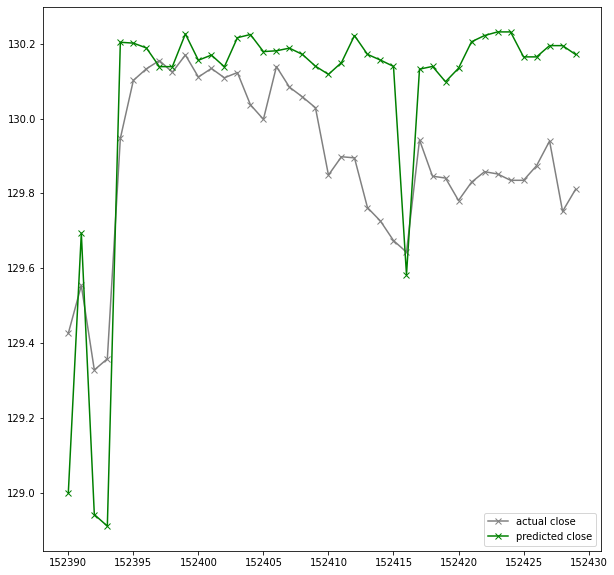

In [55]:
f=plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
line1 = plt.plot(df_t.test, label = 'actual close', marker='x', color='grey')
#include actual high and low range

line2 = plt.plot(df_t.pred, label = 'predicted close', marker='x', color='g')
plt.legend()
plt.show()
 

In [56]:
#include actual high and low range
df_t['test_high']=df_raw1.iloc[-40:,1:2].shift(-1)
df_t['test_low']=df_raw1.iloc[-40:,2:3].shift(-1)
df_t

,test,pred,test_high,test_low
152390,129.426,128.999756,NaN,NaN
152391,129.554,129.693649,129.616,129.422
152392,129.328,128.941666,129.555,129.303
152393,129.358,128.910782,129.445,129.206
152394,129.947,130.203949,129.988,129.373
152395,130.102,130.201691,130.135,129.893
152396,130.133,130.188797,130.135,129.954
152397,130.155,130.138809,130.176,130.057
152398,130.124,130.138809,130.183,130.092
152399,130.170,130.226135,130.182,130.118


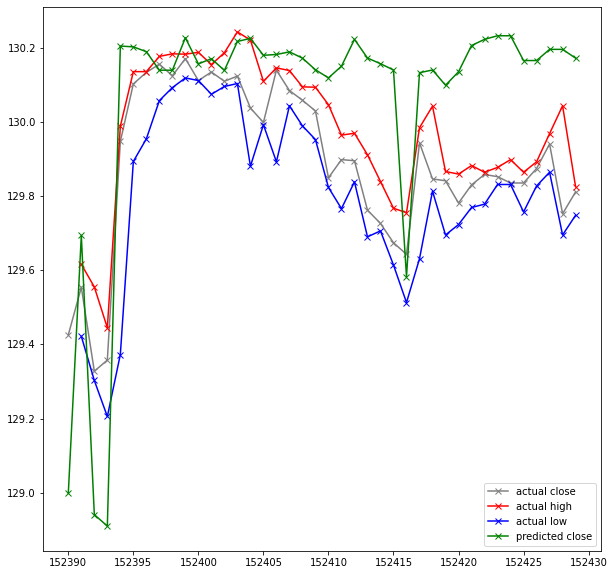

In [57]:
f=plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
line1 = plt.plot(df_t.test, label = 'actual close', marker='x', color='grey')
#include actual high and low range
line1_h = plt.plot(df_t.test_high, label = 'actual high', marker='x', color='r')
line1_l = plt.plot(df_t.test_low, label = 'actual low', marker='x', color='b')

line2 = plt.plot(df_t.pred, label = 'predicted close', marker='x', color='g')
plt.legend()
plt.show()
 

In [58]:
print(stop_for_sell)
print(stop_for_buy)

count    21.000000
mean      0.043381
std       0.033485
min       0.001000
25%       0.016000
50%       0.035000
75%       0.074000
max       0.104000
Name: stop_for_sell, dtype: float64
count    19.000000
mean      0.041842
std       0.046302
min       0.000000
25%       0.006000
50%       0.012000
75%       0.065500
max       0.148000
Name: stop_for_buy, dtype: float64


In [59]:
# clears the model after a run so you can contrast new runs.
# predictor.unpersist_models('ag_predict_interval')
# predictor.save_space()
# predictor.delete_models(models_to_keep='best', dry_run=False)
%rm -rf AutogluonModels, ag_predict_interval
!ls

agModels-predictClose  sample_data  USDJPY_H1_197101040000_202206030400.csv
